In [96]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import scipy.fftpack
file = pd.read_csv('data.txt', delimiter='\t')


In [97]:
data = file.to_numpy()
X = data[:,0]
Y = data[:,1]
Z = data[:,2]
angle = np.zeros(len(X))
for i in range(len(X)):
    angle[i] = (math.atan2(X[i],Z[i]) * 90 / math.pi)

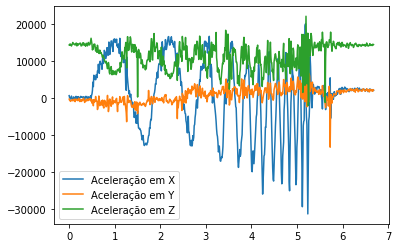

In [98]:
t = np.linspace(0, 0.01 * len(X), len(X))

plt.plot(t, X, label = "Aceleração em X")
plt.plot(t, Y, label = "Aceleração em Y")
plt.plot(t, Z, label = "Aceleração em Z")
plt.legend() 
plt.show() 

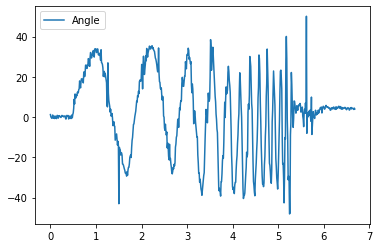

In [99]:
plt.plot(t, angle, label = "Angle")
plt.legend()
plt.show() 

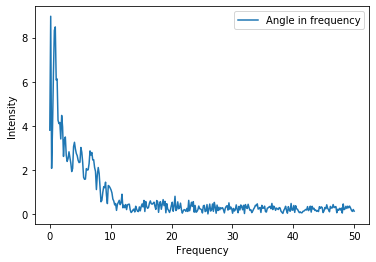

In [111]:
N = len(angle)
Ts = 0.01
yf = scipy.fftpack.fft(angle)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]), label = "Angle in frequency")
plt.xlabel('Frequency') 

plt.ylabel('Intensity') 
plt.legend()
plt.show()

0.38586954509503757


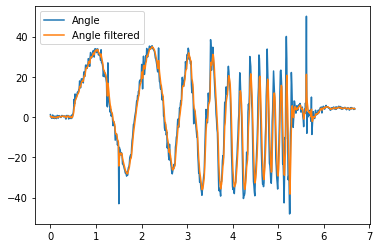

In [133]:
Fc = 10
#hertz
Wc = 2 * math.pi * Fc #rad/s
a = Wc*Ts / (1 + Wc*Ts)
print(a)
output = np.zeros(len(angle))

for i in range(len(angle)):
    output[i] = a * angle[i] + (1 - a) * output[i-1]
    
plt.plot(t, angle, label = "Angle")
plt.plot(t, output, label = "Angle filtered")
plt.legend()
plt.show() 
    